In [1]:
!pip install pygco imcut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygco: filename=pygco-0.0.16-cp38-cp38-linux_x86_64.whl size=373440 sha256=9edaaf2bad29ac77b3f9fd7494b7a3604cad2bd8aa1185da8a51032857833a27
  Stored in directory: /root/.cache/pip/wheels/c7/a2/c6/edae53a0994ed7913c901663dfc7cba042067857a7cc05ed42
  Created wheel for imcut: filename=imcut-1.9.4-py3-none-any.whl size=53541 sha256=3d96ee0b839629f849ef096a24329abfd712344a1502279cdb7aadce282ff445
  Stored in directory: /root/.cache/pip/wheels/fa/a1/5b/fac311f8c8743806ba97f2c2406469b75a7557d17c937c6fcf
Successfully built pygco imcut


In [15]:
import imcut.pycut
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [20]:
image = cv2.imread('./sample_data/original.png', cv2.IMREAD_GRAYSCALE)

In [28]:
image.shape

(100, 100)

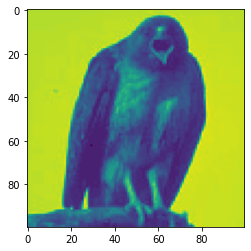

In [29]:
plt.imshow(image)

In [31]:
image3d = np.reshape(image, (100, 100, -1))

In [32]:
image3d.shape

(100, 100, 1)

In [33]:
seededImage = cv2.imread('./sample_data/onlySeeds3.png')

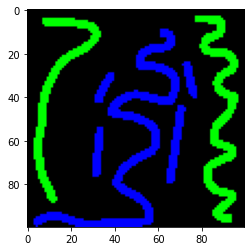

In [34]:
plt.imshow(seededImage)

In [35]:
seeds = np.zeros(image.shape, dtype="uint8")

In [36]:
for x in range(seededImage.shape[0]):
  for y in range(seededImage.shape[1]):
    pixel = np.array2string(seededImage[x, y])
    
    if (pixel == '[  0   0 255]'):      # FOREGROUND
      seeds[x, y] = 1
    elif (pixel == '[  0 255   0]'):    # BACKGROUND
      seeds[x, y] = 2

In [45]:
seeds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
seeds3d = np.reshape(seeds, (100, 100, -1))

In [38]:
seeds3d.shape

(100, 100, 1)

In [42]:
gc = imcut.pycut.ImageGraphCut(image3d)
gc.set_seeds(seeds3d)
gc.run()

mask = gc.segmentation.squeeze()
mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int8)

the resulting mask is a 2d numpy array containing 0s (foreground/object) and 1s (background)

In [43]:
mask.shape

(100, 100)

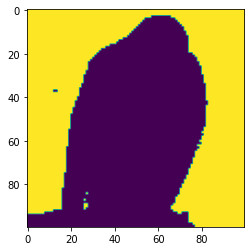

In [44]:
plt.imshow(mask)

In [46]:
segmentedImage = np.zeros(image.shape, dtype="uint8")

In [47]:
for x in range(mask.shape[0]):
  for y in range(mask.shape[1]):
    isForeground = mask[x, y] == 0;
    if (isForeground):
      segmentedImage[x, y] = image[x, y]

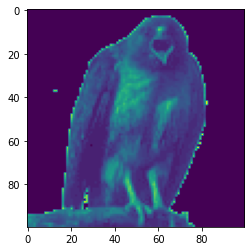

In [48]:
plt.imshow(segmentedImage)

imcut performance > scratch implementation (therefore this gets discarted in favor of imcut)

# TODO
* implement interactive UI using COLAB tooling (review https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=iU_0F2SVW4Yb)